<a href="https://colab.research.google.com/github/mfvalle/Maths_for_MachineLearning/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Honey Production in the USA (1998-2012)](https://www.kaggle.com/datasets/jessicali9530/honey-production)

In 2006, global concern was raised over the rapid decline in the honeybee population, an integral component to American honey agriculture. Large numbers of hives were lost to Colony Collapse Disorder, a phenomenon of disappearing worker bees causing the remaining hive colony to collapse. Speculation to the cause of this disorder points to hive diseases and pesticides harming the pollinators, though no overall consensus has been reached. Twelve years later, some industries are observing recovery but the American honey industry is still largely struggling. The U.S. used to locally produce over half the honey it consumes per year. Now, honey mostly comes from overseas, with 350 of the 400 million pounds of honey consumed every year originating from imports. This dataset provides insight into honey production supply and demand in America by state from 1998 to 2012.

We will create a model to investigate the decline of the honeybee population for various reasons and how the trends of the past predict the future for the honeybees


In [ ]:
!git clone https://github.com/mfvalle/Maths_for_MachineLearning.git

Cloning into 'Maths_for_MachineLearning'...
remote: Enumerating objects: 57, done.
remote: Counting objects: 100% (57/57), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 57 (delta 21), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (57/57), 1.30 MiB | 2.08 MiB/s, done.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
#from sklearn.linear_model import LinearRegression

df = pd.read_csv("/content/Maths_for_MachineLearning/US_honey_production_dataset.csv")

In [ ]:
#get a sense of how this DataFrame is structured
df.head()

,Unnamed: 0,state,colony_number,yield_per_colony,productions,stocks,average_price,value_of_prod,year
0,0,Alabama,9000,54,73000,73000,240.0,1166000,2010
1,1,Arizona,24000,77,665000,665000,152.0,2809000,2010
2,2,Arkansas,25000,60,360000,360000,147.0,2205000,2010
3,3,California,410000,67,6318000,6318000,155.0,42579000,2010
4,4,Colorado,34000,56,533000,533000,152.0,2894000,2010


[[-20309.48090371]]
[41846658.12040523]


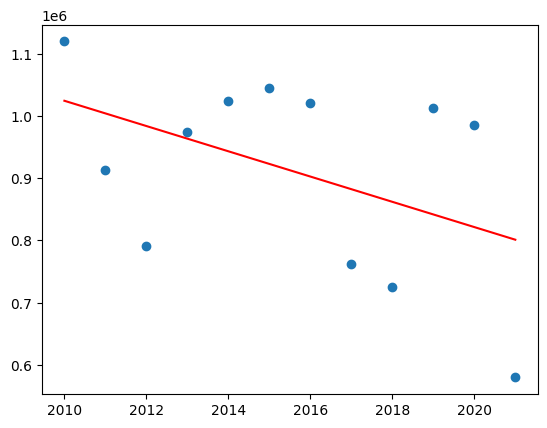

In [ ]:
#Now we store the mean of totalprod (productions column) per year by grouping the year column
prod_per_year = df.groupby("year").productions.mean().reset_index()

# Create years and totalprod columns (to treat them as vectors of inputs and outputs), and reshape into the right format
X = prod_per_year["year"].values.reshape(-1, 1)
y = prod_per_year["productions"].values.reshape(-1, 1)

# Display the scatterplot
plt.scatter(X, y)

regr = linear_model.LinearRegression()
regr.fit(X, y)

# Print out the slope of the line and the intercept of the line
print(regr.coef_)
print(regr.intercept_)

# Predict the values
future_predict = regr.predict(X)

# Plot the line on top of the scatterplot
plt.plot(X, future_predict, color='red')
plt.show()


It looks like the production of honey has been in decline, according to this linear model. Let’s predict what the year 2050 may look like in terms of honey production. Our known dataset stops at the year 2013, so let’s create a NumPy array that is the range from 2013 to 2050.

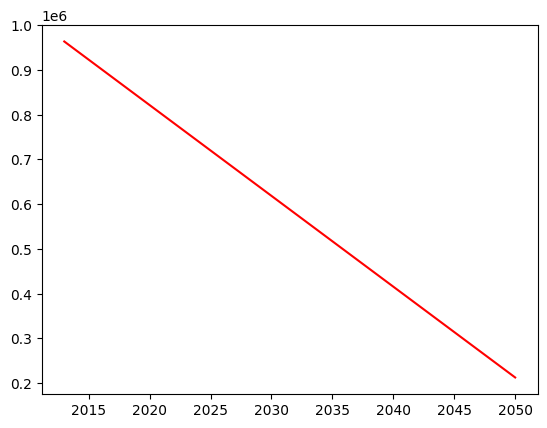

In [ ]:
# Define the range for future predictions
nums = np.array(range(2013, 2051))
# Reshape it for scikit-learn
X_future = nums.reshape(-1, 1)

# Predict the values for X_future
future_predict = regr.predict(X_future)

# Plot the line on top of the scatterplot
plt.plot(X_future, future_predict, color='red')

plt.show()

#[StreetEasy Dataset](https://raw.githubusercontent.com/Codecademy/datasets/master/streeteasy/streeteasy.csv)

[StreetEasy](https://streeteasy.com/) is New York City’s leading real estate marketplace — from studios to high-rises, Brooklyn Heights to Harlem.

This Dataset consists of 5,000 rentals listings in Manhattan active on StreetEasy in June 2016. In regression, the independent variables will either have a positive linear relationship to the dependent variable, a negative linear relationship, or no relationship. A negative linear relationship means that as X values increase, Y values will decrease. Similarly, a positive linear relationship means that as X values increase, Y values will also increase.

Multiple linear regression uses a set of independent variables and a dependent variable. It uses these variables to learn how to find optimal parameters. It takes a labeled dataset and learns from it. Once we confirm that it’s learned correctly, we can then use it to make predictions by plugging in new x values.

Graphically, when you see a downward trend, it means a negative linear relationship exists. When you find an upward trend, it indicates a positive linear relationship.

We will perform multiple linear regression on this dataset, making predictions for price.


Train score:
0.7725460559817883
Test score:
0.8050371975357646


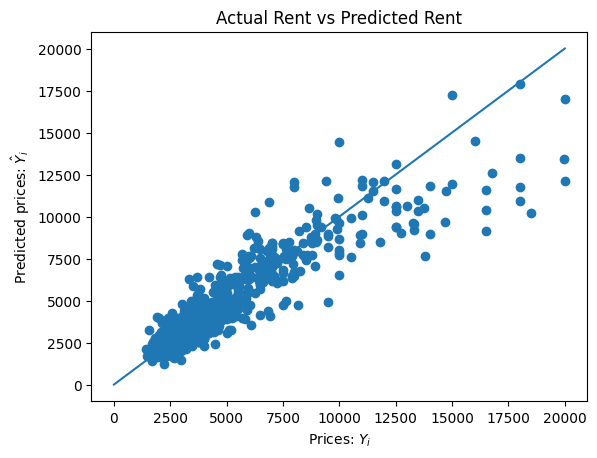

Predicted rent: $2592.38


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# import train_test_split

streeteasy = pd.read_csv("/content/Maths_for_MachineLearning/manhattan.csv")

df = pd.DataFrame(streeteasy)

x = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]
y = df[['rent']]

#split data
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)

#Create model and fit model
lm = LinearRegression()

model = lm.fit(x_train, y_train)
y_predict= lm.predict(x_test)

print("Train score:")
print(lm.score(x_train, y_train))

print("Test score:")
print(lm.score(x_test, y_test))

#plot predicted vs actual rent
plt.scatter(y_test, y_predict)
plt.plot(range(20000), range(20000))
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Actual Rent vs Predicted Rent")

plt.show()


zoe_apartment = [[1, 1, 620, 16, 1, 98, 0, 0, 1, 0, 0, 0, 1, 0]]
predict = model.predict(zoe_apartment)
print("Predicted rent: $%.2f" % predict)


# Evaluating the Model's Accuracy
When trying to evaluate the accuracy of our multiple linear regression model, one technique we can use is **Residual Analysis**.
The difference between the actual value y, and the predicted value ŷ is the **residual e**. The equation is: $$e = y - \hat{y}.$$

In the StreetEasy dataset, y is the actual rent and the ŷ is the predicted rent. The real y values should be pretty close to these predicted y values.

The .score() method that returns the coefficient of determination R² of the prediction.

The coefficient R² is defined as: $$1 - \frac{u}{v}m$$ where u is the residual sum of squares and v is the total sum of squares (TSS).

The TSS tells you how much variation there is in the y variable.

R² is the percentage variation in y explained by all the x variables together.

For example, say we are trying to predict rent based on the size_sqft and the bedrooms in the apartment and the R² for our model is 0.72 — that means that all the x variables (square feet and number of bedrooms) together explain 72% variation in y (rent).

Now let’s say we add another x variable, building’s age, to our model. By adding this third relevant x variable, the R² is expected to go up. Let say the new R² is 0.95. This means that square feet, number of bedrooms and age of the building together explain 95% of the variation in the rent.

The best possible R² is 1.00 (and it can be negative because the model can be arbitrarily worse). Usually, a R² of 0.70 is considered good.

Train score:
0.7725460559817883
Test score:
0.8050371975357646


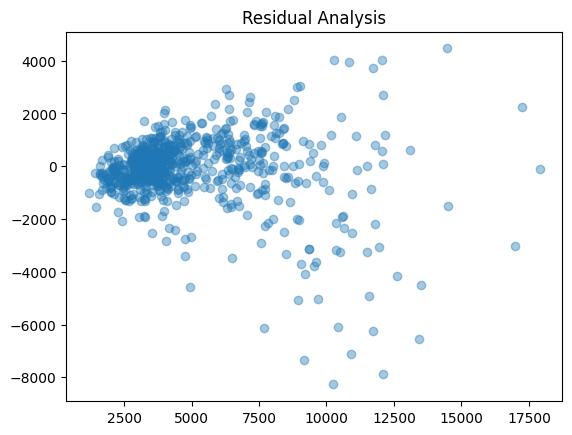

In [ ]:
#find the mean squared error regression loss for the training set
print("Train score:")
print(lm.score(x_train, y_train))

#find the mean squared error regression loss for the testing set
print("Test score:")
print(lm.score(x_test, y_test))

#graph a scatter plot of residuals vs. predicted_y values
residuals = y_predict - y_test
 
plt.scatter(y_predict, residuals, alpha=0.4)
plt.title('Residual Analysis')
 
plt.show()